In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pywt
print(cv2.__version__)

4.8.1


In [2]:
# Load the ground truth and reconstructed images
ground_truth = cv2.imread('data_output_50_epochs/Original_0.png')
reconstructed = cv2.imread('data_output_50_epochs/Reconstructed_0.png')

# Ensure both images are of the same size and type
# You might need to resize or convert them
# For example: ground_truth = cv2.resize(ground_truth, (width, height))

# Compute the residual
residual = cv2.absdiff(ground_truth, reconstructed)

Text(0.5, 1.0, 'Residual')

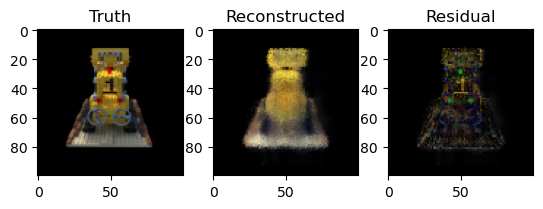

In [3]:
fig,ax = plt.subplots(1,3)

ax[0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[0].set_title("Truth")
ax[1].imshow(cv2.cvtColor(reconstructed, cv2.COLOR_BGR2RGB))
ax[1].set_title("Reconstructed")
ax[2].imshow(cv2.cvtColor(residual, cv2.COLOR_BGR2RGB))
ax[2].set_title("Residual")

In [4]:
ground_truth_flat = ground_truth.flatten()

Mean: 9.058, Median: 0.0, Standard Deviation: 18.5571433505627, Corr: 0.5532934163120752


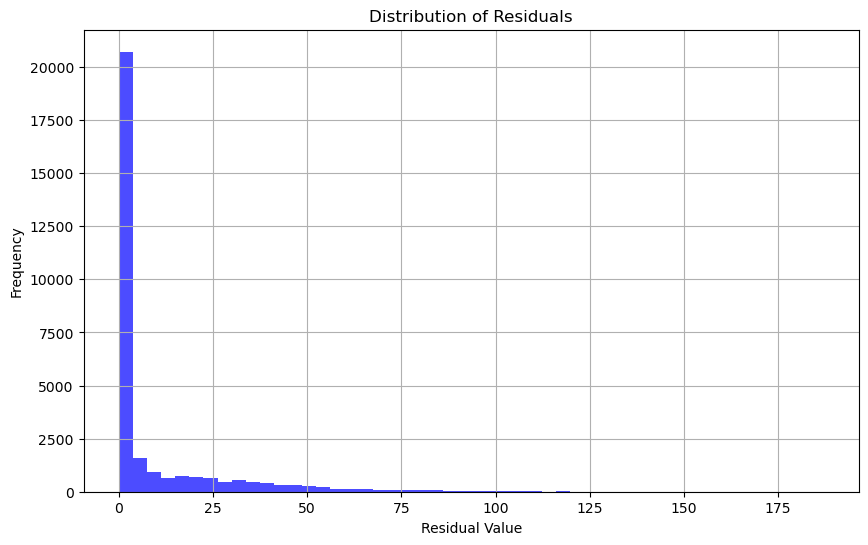

In [5]:
# Flatten the residual to a 1D array
residual_flat = residual.flatten()

# Statistical Analysis
mean_res = np.mean(residual_flat)
median_res = np.median(residual_flat)
std_res = np.std(residual_flat)

print(f"Mean: {mean_res}, Median: {median_res}, Standard Deviation: {std_res}, Corr: {np.corrcoef(ground_truth_flat,residual_flat)[0,1]}")

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(residual_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Gaussian Blur

Text(0.5, 1.0, 'Residual')

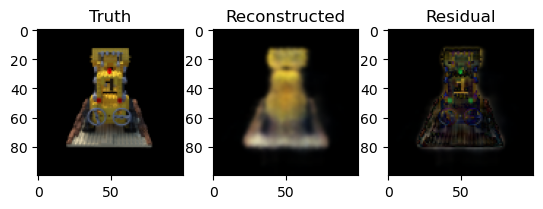

In [6]:
# Apply Gaussian Blur
gaussian_blur = cv2.GaussianBlur(reconstructed, (5, 5), 0)
residual1 = cv2.absdiff(ground_truth, gaussian_blur)

fig,ax = plt.subplots(1,3)

ax[0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[0].set_title("Truth")
ax[1].imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
ax[1].set_title("Reconstructed")
ax[2].imshow(cv2.cvtColor(residual1, cv2.COLOR_BGR2RGB))
ax[2].set_title("Residual")

Mean: 9.014233333333333, Median: 0.0, Standard Deviation: 17.60410834849512, Corr: 0.5171405315742111


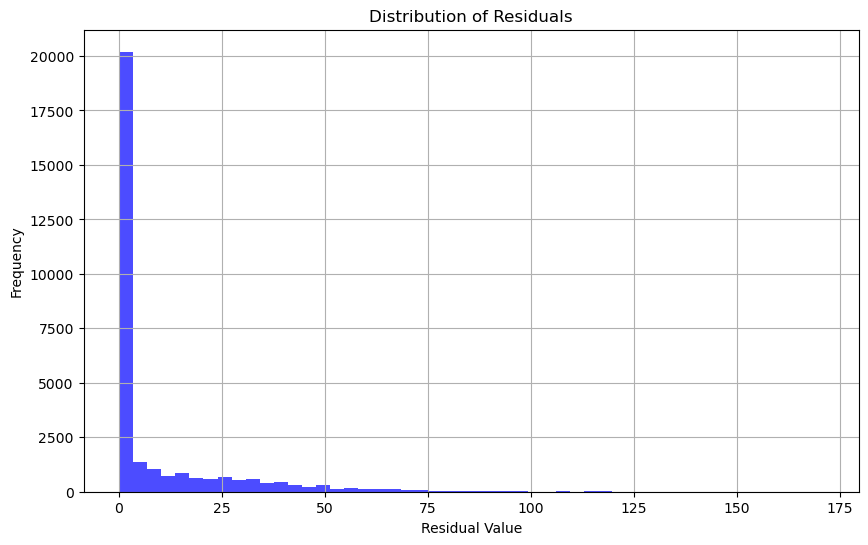

In [7]:
# Flatten the residual to a 1D array
residual_flat = residual1.flatten()

# Statistical Analysis
mean_res = np.mean(residual_flat)
median_res = np.median(residual_flat)
std_res = np.std(residual_flat)

print(f"Mean: {mean_res}, Median: {median_res}, Standard Deviation: {std_res}, Corr: {np.corrcoef(ground_truth_flat,residual_flat)[0,1]}")

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(residual_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Median Filter

Text(0.5, 1.0, 'Residual')

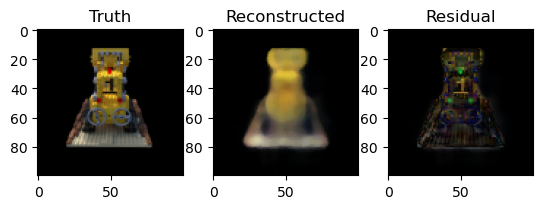

In [8]:
median_filtered = cv2.medianBlur(reconstructed, 5)
residual2 = cv2.absdiff(ground_truth, median_filtered)

fig,ax = plt.subplots(1,3)

ax[0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[0].set_title("Truth")
ax[1].imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
ax[1].set_title("Reconstructed")
ax[2].imshow(cv2.cvtColor(residual2, cv2.COLOR_BGR2RGB))
ax[2].set_title("Residual")

Mean: 8.700633333333334, Median: 0.0, Standard Deviation: 17.773739418935516, Corr: 0.538876808764341


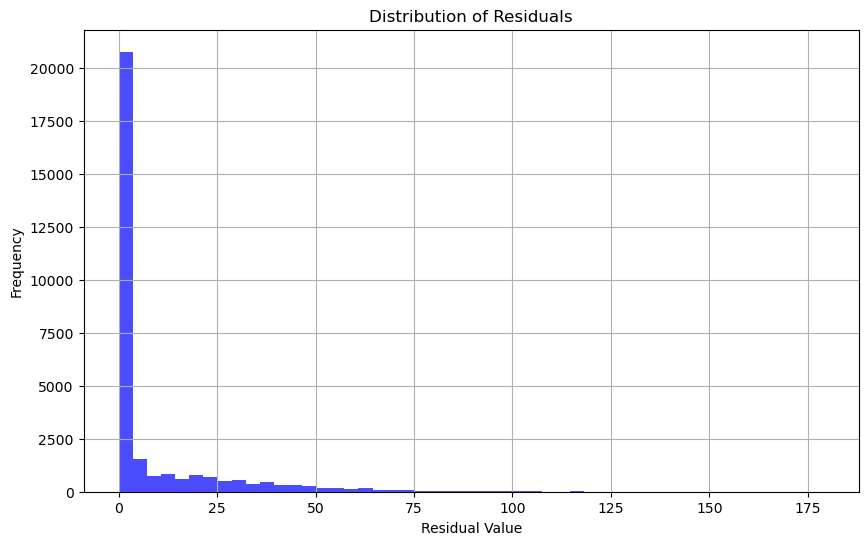

In [9]:
# Flatten the residual to a 1D array
residual_flat = residual2.flatten()

# Statistical Analysis
mean_res = np.mean(residual_flat)
median_res = np.median(residual_flat)
std_res = np.std(residual_flat)

print(f"Mean: {mean_res}, Median: {median_res}, Standard Deviation: {std_res}, Corr: {np.corrcoef(ground_truth_flat,residual_flat)[0,1]}")

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(residual_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Bilateral Filtering

Text(0.5, 1.0, 'Residual')

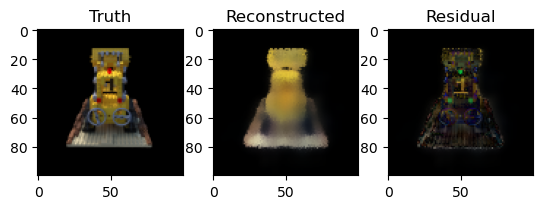

In [10]:
bilateral_filter = cv2.bilateralFilter(reconstructed, 9, 75, 75)
residual3 = cv2.absdiff(ground_truth, bilateral_filter)

fig,ax = plt.subplots(1,3)

ax[0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[0].set_title("Truth")
ax[1].imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
ax[1].set_title("Reconstructed")
ax[2].imshow(cv2.cvtColor(residual3, cv2.COLOR_BGR2RGB))
ax[2].set_title("Residual")

Mean: 8.998533333333333, Median: 0.0, Standard Deviation: 17.934660981338777, Corr: 0.5492669618573773


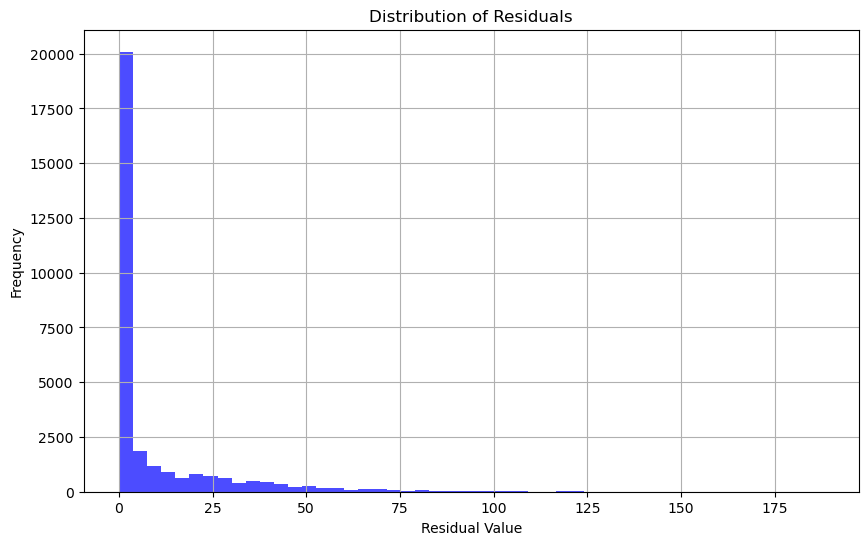

In [11]:
# Flatten the residual to a 1D array
residual_flat = residual3.flatten()

# Statistical Analysis
mean_res = np.mean(residual_flat)
median_res = np.median(residual_flat)
std_res = np.std(residual_flat)

print(f"Mean: {mean_res}, Median: {median_res}, Standard Deviation: {std_res}, Corr: {np.corrcoef(ground_truth_flat,residual_flat)[0,1]}")

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(residual_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Non-local Means Denoising

Text(0.5, 1.0, 'Residual')

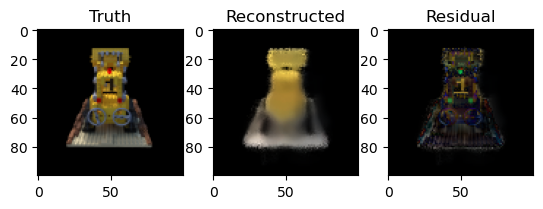

In [12]:
non_local_means = cv2.fastNlMeansDenoisingColored(reconstructed,None, 10, 10, 7, 21)

residual4 = cv2.absdiff(ground_truth, non_local_means)

fig,ax = plt.subplots(1,3)

ax[0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[0].set_title("Truth")
ax[1].imshow(cv2.cvtColor(non_local_means, cv2.COLOR_BGR2RGB))
ax[1].set_title("Reconstructed")
ax[2].imshow(cv2.cvtColor(residual4, cv2.COLOR_BGR2RGB))
ax[2].set_title("Residual")

Mean: 9.038133333333333, Median: 0.0, Standard Deviation: 18.45314821872469, Corr: 0.5587914138420694


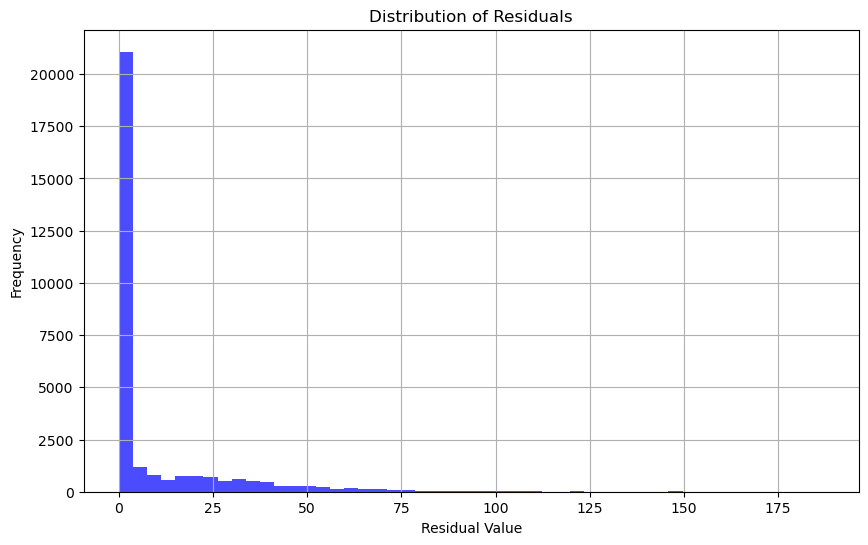

In [13]:
# Flatten the residual to a 1D array
residual_flat = residual4.flatten()

# Statistical Analysis
mean_res = np.mean(residual_flat)
median_res = np.median(residual_flat)
std_res = np.std(residual_flat)

print(f"Mean: {mean_res}, Median: {median_res}, Standard Deviation: {std_res}, Corr: {np.corrcoef(ground_truth_flat,residual_flat)[0,1]}")

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(residual_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## WaveNet Transformation

In [14]:
def wavelet_denoising_color(image):
    # Function to pad an image to the next power of two
    def pad_to_power_of_two(img):
        rows, cols = img.shape[:2]
        nrows, ncols = 2**np.ceil(np.log2(rows)), 2**np.ceil(np.log2(cols))
        return cv2.copyMakeBorder(img, 0, int(nrows-rows), 0, int(ncols-cols), cv2.BORDER_REFLECT)

    # Function to crop the image back to original size
    def crop_to_original_size(img, original):
        rows, cols = original.shape[:2]
        return img[:rows, :cols]

    original_size = image.shape[:2]
    padded_image = pad_to_power_of_two(image)
    channels = cv2.split(padded_image)
    denoised_channels = []

    for channel in channels:
        coeffs = pywt.wavedec2(channel, 'db1', level=1)
        cA, (cH, cV, cD) = coeffs

        cH = pywt.threshold(cH, value=0.5 * np.max(cH), mode='soft')
        cV = pywt.threshold(cV, value=0.5 * np.max(cV), mode='soft')
        cD = pywt.threshold(cD, value=0.5 * np.max(cD), mode='soft')

        denoised_channel = pywt.waverec2((cA, (cH, cV, cD)), 'db1')
        denoised_channels.append(denoised_channel)

    denoised_image = cv2.merge(denoised_channels)
    denoised_image = crop_to_original_size(denoised_image, image)

    return denoised_image

wavelet_denoised = wavelet_denoising_color(reconstructed)

Text(0.5, 1.0, 'Residual')

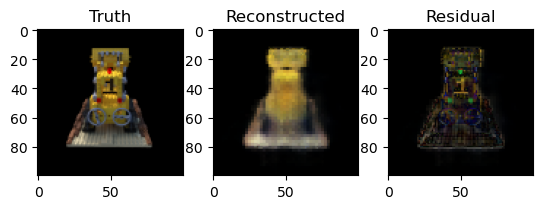

In [15]:
residual5 = cv2.absdiff(ground_truth.astype(np.uint8), wavelet_denoised.astype(np.uint8))

fig,ax = plt.subplots(1,3)

ax[0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[0].set_title("Truth")
ax[1].imshow(cv2.cvtColor(wavelet_denoised.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[1].set_title("Reconstructed")
ax[2].imshow(cv2.cvtColor(residual5, cv2.COLOR_BGR2RGB))
ax[2].set_title("Residual")

Mean: 9.164133333333334, Median: 0.0, Standard Deviation: 18.499598020377512,Corr: 0.5401499294339811


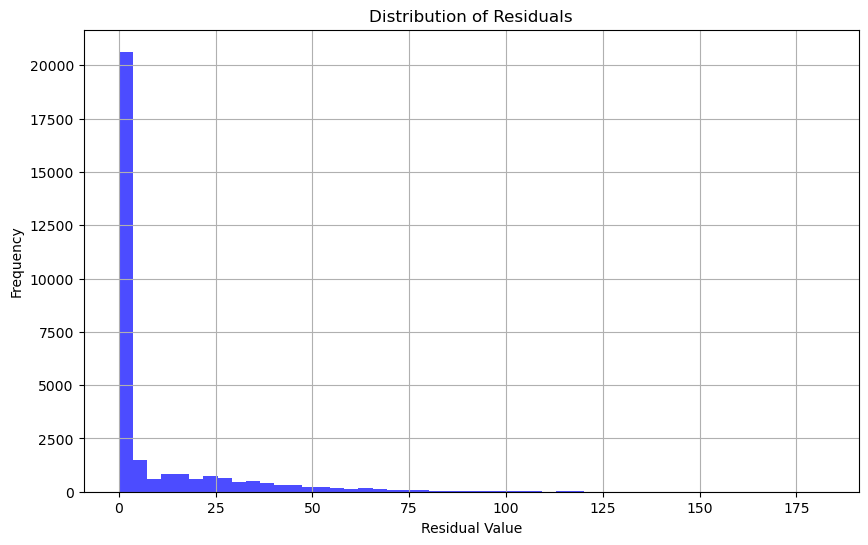

In [16]:
# Flatten the residual to a 1D array
residual_flat = residual5.flatten()

# Statistical Analysis
mean_res = np.mean(residual_flat)
median_res = np.median(residual_flat)
std_res = np.std(residual_flat)

print(f"Mean: {mean_res}, Median: {median_res}, Standard Deviation: {std_res},Corr: {np.corrcoef(ground_truth_flat,residual_flat)[0,1]}")

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(residual_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Combined Graph

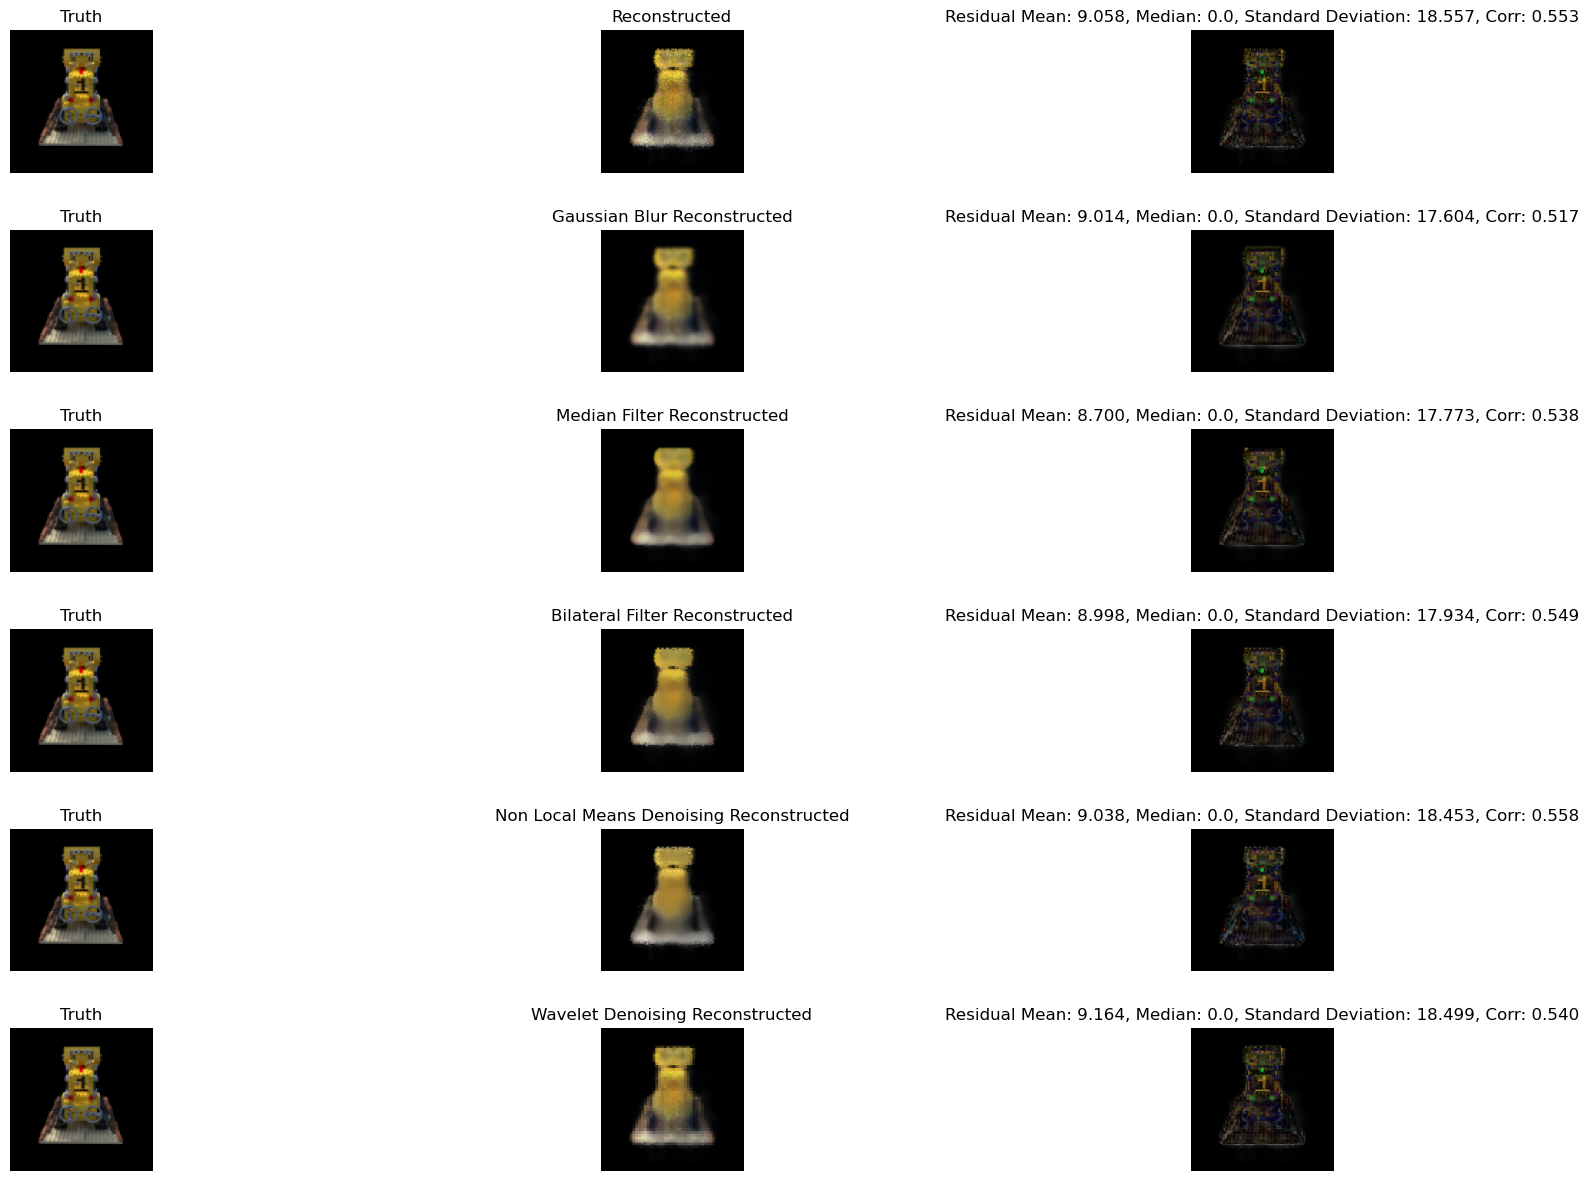

In [17]:
# Create a figure with subplots
fig, ax = plt.subplots(6, 3, figsize=(18, 12))

# Adjust the layout to prevent overlapping
fig.tight_layout()


# Make sure the images cover more space in each subplot by adjusting the aspect ratio
for axs in ax:
    for a in axs:
        a.set_aspect('equal')

# Remove the axis for each subplot for better visualization
for row in ax:
    for col in row:
        col.axis('off')

        
        
        

        
ax[0,0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[0,0].set_title("Truth")
ax[0,1].imshow(cv2.cvtColor(reconstructed, cv2.COLOR_BGR2RGB))
ax[0,1].set_title("Reconstructed")
ax[0,2].imshow(cv2.cvtColor(residual, cv2.COLOR_BGR2RGB))
ax[0,2].set_title("Residual Mean: 9.058, Median: 0.0, Standard Deviation: 18.557, Corr: 0.553")

ax[1,0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[1,0].set_title("Truth")
ax[1,1].imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
ax[1,1].set_title("Gaussian Blur Reconstructed")
ax[1,2].imshow(cv2.cvtColor(residual1, cv2.COLOR_BGR2RGB))
ax[1,2].set_title("Residual Mean: 9.014, Median: 0.0, Standard Deviation: 17.604, Corr: 0.517")

ax[2,0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[2,0].set_title("Truth")
ax[2,1].imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
ax[2,1].set_title("Median Filter Reconstructed")
ax[2,2].imshow(cv2.cvtColor(residual2, cv2.COLOR_BGR2RGB))
ax[2,2].set_title("Residual Mean: 8.700, Median: 0.0, Standard Deviation: 17.773, Corr: 0.538")

ax[3,0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[3,0].set_title("Truth")
ax[3,1].imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
ax[3,1].set_title("Bilateral Filter Reconstructed")
ax[3,2].imshow(cv2.cvtColor(residual3, cv2.COLOR_BGR2RGB))
ax[3,2].set_title("Residual Mean: 8.998, Median: 0.0, Standard Deviation: 17.934, Corr: 0.549")

ax[4,0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[4,0].set_title("Truth")
ax[4,1].imshow(cv2.cvtColor(non_local_means, cv2.COLOR_BGR2RGB))
ax[4,1].set_title("Non Local Means Denoising Reconstructed")
ax[4,2].imshow(cv2.cvtColor(residual4, cv2.COLOR_BGR2RGB))
ax[4,2].set_title("Residual Mean: 9.038, Median: 0.0, Standard Deviation: 18.453, Corr: 0.558")

ax[5,0].imshow(cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB))
ax[5,0].set_title("Truth")
ax[5,1].imshow(cv2.cvtColor(wavelet_denoised.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[5,1].set_title("Wavelet Denoising Reconstructed")
ax[5,2].imshow(cv2.cvtColor(residual5, cv2.COLOR_BGR2RGB))
ax[5,2].set_title("Residual Mean: 9.164, Median: 0.0, Standard Deviation: 18.499, Corr: 0.540")

# Set the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.1)

fig.savefig("results.jpg",dpi = 600)

## Detect the Edge

If we have the ground truth it would be better,
If we don't have, the edge of the reconstructed may be better

In [18]:
edges = cv2.Canny(ground_truth, threshold1=100, threshold2=200)


# Create a mask where edges are
edge_mask = edges != 0

# Create an image of zeros with the same shape as the ground truth image
colored_edges = np.zeros_like(reconstructed)

residual_test = residual.copy()

residual_test[edge_mask] = 0


Text(0.5, 1.0, 'Reconstructed Residual Subtract Edge')

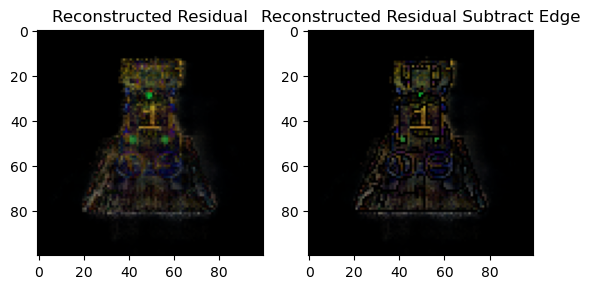

In [19]:
fig,ax = plt.subplots(1,2)

ax[0].imshow(cv2.cvtColor(residual, cv2.COLOR_BGR2RGB))
ax[0].set_title("Reconstructed Residual")
ax[1].imshow(cv2.cvtColor(residual_test, cv2.COLOR_BGR2RGB))
ax[1].set_title("Reconstructed Residual Subtract Edge")

Mean: 6.4571, Median: 0.0, Standard Deviation: 15.968695195809413,Corr: 0.4304671296224723


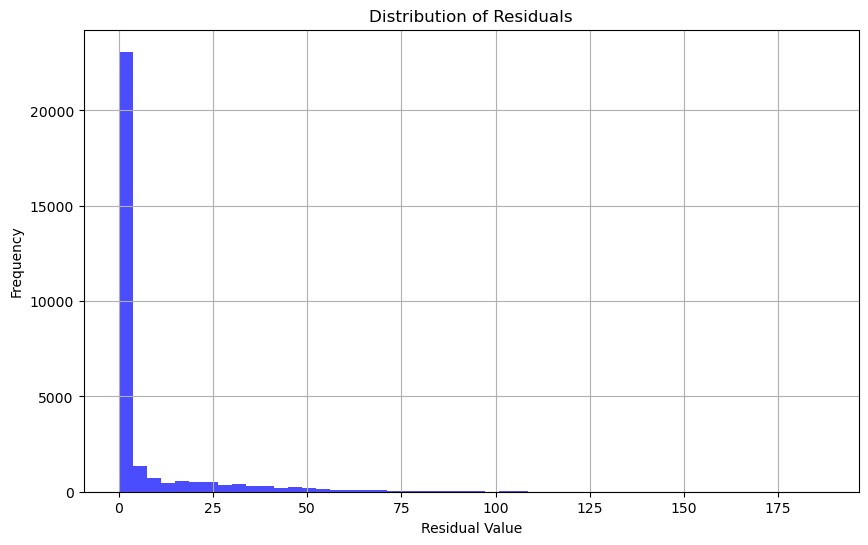

In [20]:
# Flatten the residual to a 1D array
residual_flat = residual_test.flatten()

# Statistical Analysis
mean_res = np.mean(residual_flat)
median_res = np.median(residual_flat)
std_res = np.std(residual_flat)

print(f"Mean: {mean_res}, Median: {median_res}, Standard Deviation: {std_res},Corr: {np.corrcoef(ground_truth_flat,residual_flat)[0,1]}")

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(residual_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

1. Different NeRF output images: Ground Truth, Reconstructed 
2. -> Provide knowledge about the distribution of |Ground Truth - Reconstructed| (Examine Residuals)
3. -> Use the knowledge to do inference for only reconstructed from an unseen angle (Denoising). 

An operator applied to |Ground Truth - Reconstructed| will have a corresponding inverse operator to reverse the operation.

- Neural Network: Not Explainable, but can fit the distribution in 2. and do inference on 3
- Traditional Methods: We know what element in math is filtered by the operator, but hard to capture all the residuals.
- The residual is correlated with the Edge of the ground truth. (Ground Truth -> Edge -> Subtract the edge -> Less Noise)
- Systematically, the noise is largely related to the object


## Fourier

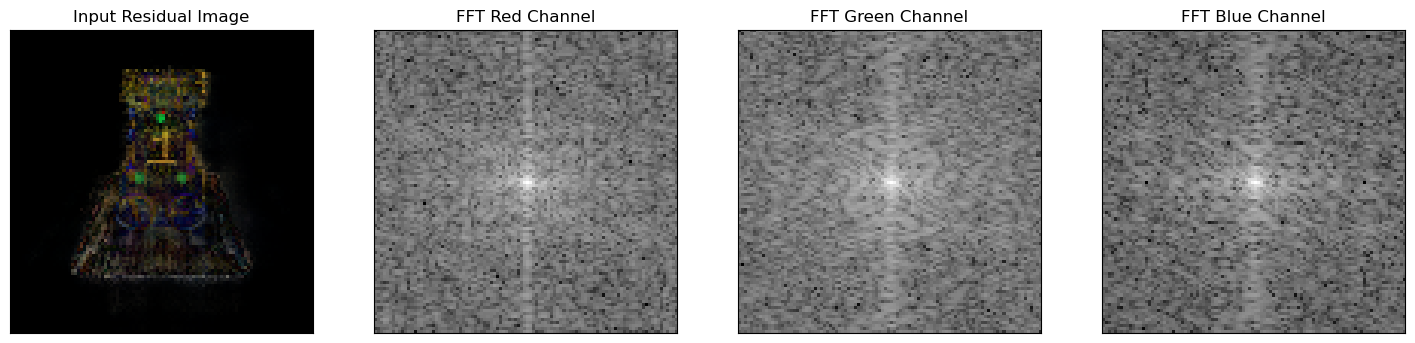

In [21]:
# Split the image into its color channels
channels = cv2.split(residual)

# Initialize a list to hold the magnitude spectrums of the channels
magnitude_spectrums = []

# Perform FFT and shift for each channel
for channel in channels:
    f = np.fft.fft2(channel)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    magnitude_spectrums.append(magnitude_spectrum)

# Plot the original image and the magnitude spectrum of each channel
plt.figure(figsize=(18, 6))

plt.subplot(141), plt.imshow(cv2.cvtColor(residual, cv2.COLOR_BGR2RGB))
plt.title('Input Residual Image'), plt.xticks([]), plt.yticks([])

colors = ['Red Channel', 'Green Channel', 'Blue Channel']
for i, magnitude_spectrum in enumerate(magnitude_spectrums, 2):
    plt.subplot(1, 4, i), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'FFT {colors[i-2]}'), plt.xticks([]), plt.yticks([])

plt.show()

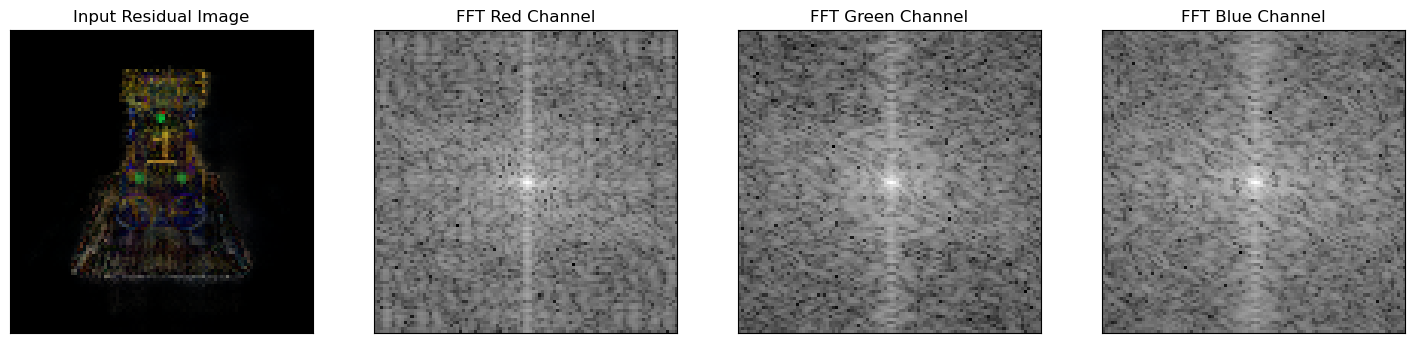

In [22]:
# Split the image into its color channels
channels = cv2.split(residual1)

# Initialize a list to hold the magnitude spectrums of the channels
magnitude_spectrums = []

# Perform FFT and shift for each channel
for channel in channels:
    f = np.fft.fft2(channel)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    magnitude_spectrums.append(magnitude_spectrum)

# Plot the original image and the magnitude spectrum of each channel
plt.figure(figsize=(18, 6))

plt.subplot(141), plt.imshow(cv2.cvtColor(residual, cv2.COLOR_BGR2RGB))
plt.title('Input Residual Image'), plt.xticks([]), plt.yticks([])

colors = ['Red Channel', 'Green Channel', 'Blue Channel']
for i, magnitude_spectrum in enumerate(magnitude_spectrums, 2):
    plt.subplot(1, 4, i), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'FFT {colors[i-2]}'), plt.xticks([]), plt.yticks([])

plt.show()

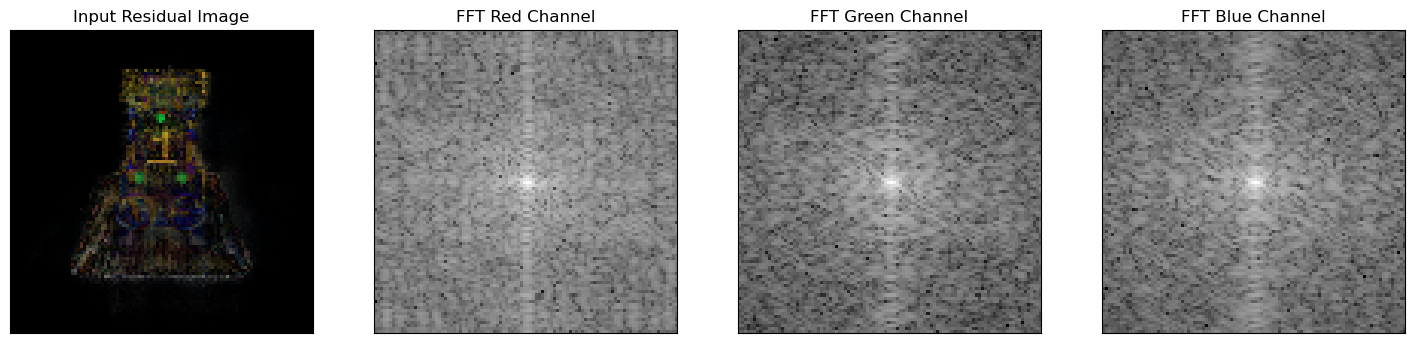

In [23]:
# Split the image into its color channels
channels = cv2.split(residual2)

# Initialize a list to hold the magnitude spectrums of the channels
magnitude_spectrums = []

# Perform FFT and shift for each channel
for channel in channels:
    f = np.fft.fft2(channel)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    magnitude_spectrums.append(magnitude_spectrum)

# Plot the original image and the magnitude spectrum of each channel
plt.figure(figsize=(18, 6))

plt.subplot(141), plt.imshow(cv2.cvtColor(residual, cv2.COLOR_BGR2RGB))
plt.title('Input Residual Image'), plt.xticks([]), plt.yticks([])

colors = ['Red Channel', 'Green Channel', 'Blue Channel']
for i, magnitude_spectrum in enumerate(magnitude_spectrums, 2):
    plt.subplot(1, 4, i), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'FFT {colors[i-2]}'), plt.xticks([]), plt.yticks([])

plt.show()

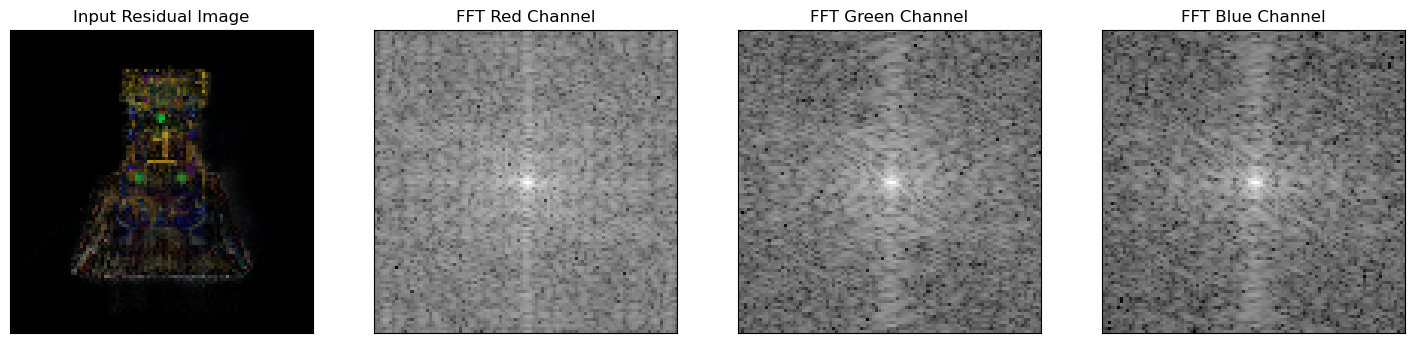

In [24]:
# Split the image into its color channels
channels = cv2.split(residual3)

# Initialize a list to hold the magnitude spectrums of the channels
magnitude_spectrums = []

# Perform FFT and shift for each channel
for channel in channels:
    f = np.fft.fft2(channel)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    magnitude_spectrums.append(magnitude_spectrum)

# Plot the original image and the magnitude spectrum of each channel
plt.figure(figsize=(18, 6))

plt.subplot(141), plt.imshow(cv2.cvtColor(residual, cv2.COLOR_BGR2RGB))
plt.title('Input Residual Image'), plt.xticks([]), plt.yticks([])

colors = ['Red Channel', 'Green Channel', 'Blue Channel']
for i, magnitude_spectrum in enumerate(magnitude_spectrums, 2):
    plt.subplot(1, 4, i), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'FFT {colors[i-2]}'), plt.xticks([]), plt.yticks([])

plt.show()

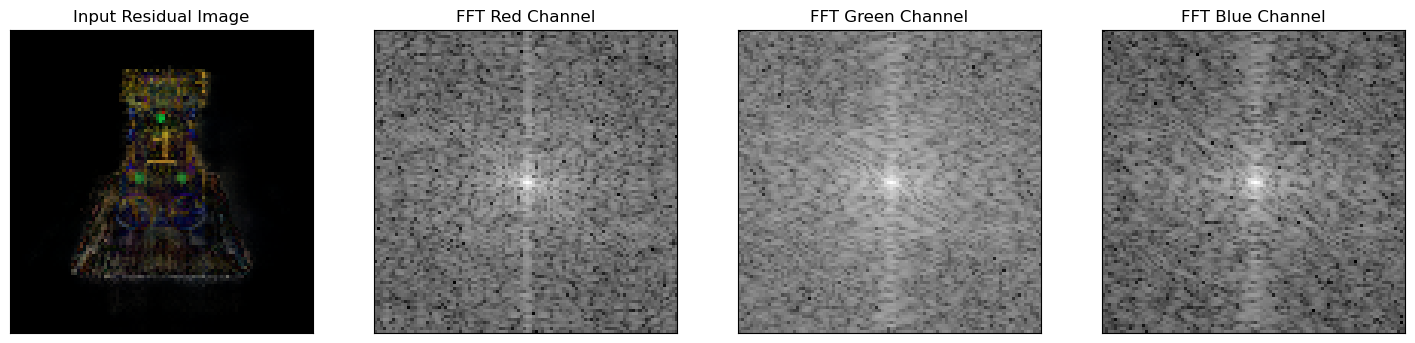

In [25]:
# Split the image into its color channels
channels = cv2.split(residual4)

# Initialize a list to hold the magnitude spectrums of the channels
magnitude_spectrums = []

# Perform FFT and shift for each channel
for channel in channels:
    f = np.fft.fft2(channel)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    magnitude_spectrums.append(magnitude_spectrum)

# Plot the original image and the magnitude spectrum of each channel
plt.figure(figsize=(18, 6))

plt.subplot(141), plt.imshow(cv2.cvtColor(residual, cv2.COLOR_BGR2RGB))
plt.title('Input Residual Image'), plt.xticks([]), plt.yticks([])

colors = ['Red Channel', 'Green Channel', 'Blue Channel']
for i, magnitude_spectrum in enumerate(magnitude_spectrums, 2):
    plt.subplot(1, 4, i), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'FFT {colors[i-2]}'), plt.xticks([]), plt.yticks([])

plt.show()

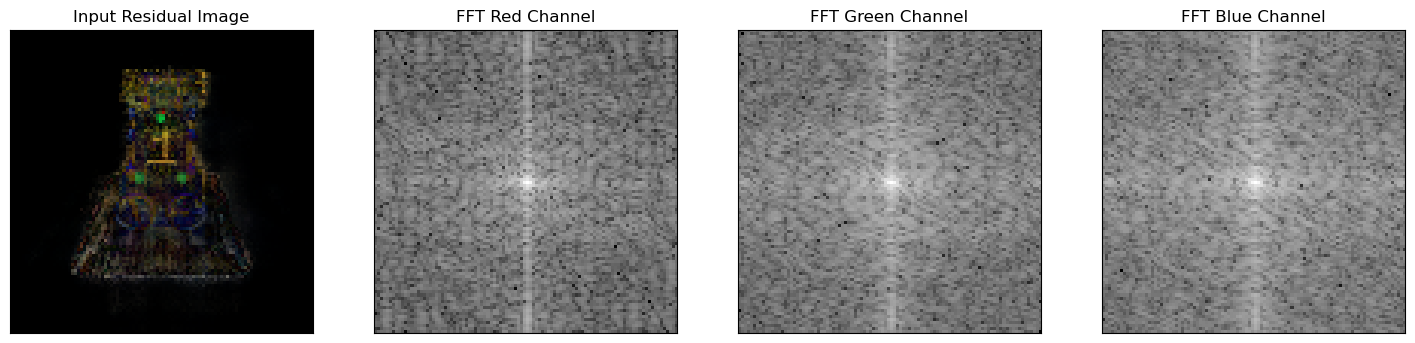

In [26]:
# Split the image into its color channels
channels = cv2.split(residual5)

# Initialize a list to hold the magnitude spectrums of the channels
magnitude_spectrums = []

# Perform FFT and shift for each channel
for channel in channels:
    f = np.fft.fft2(channel)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    magnitude_spectrums.append(magnitude_spectrum)

# Plot the original image and the magnitude spectrum of each channel
plt.figure(figsize=(18, 6))

plt.subplot(141), plt.imshow(cv2.cvtColor(residual, cv2.COLOR_BGR2RGB))
plt.title('Input Residual Image'), plt.xticks([]), plt.yticks([])

colors = ['Red Channel', 'Green Channel', 'Blue Channel']
for i, magnitude_spectrum in enumerate(magnitude_spectrums, 2):
    plt.subplot(1, 4, i), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'FFT {colors[i-2]}'), plt.xticks([]), plt.yticks([])

plt.show()

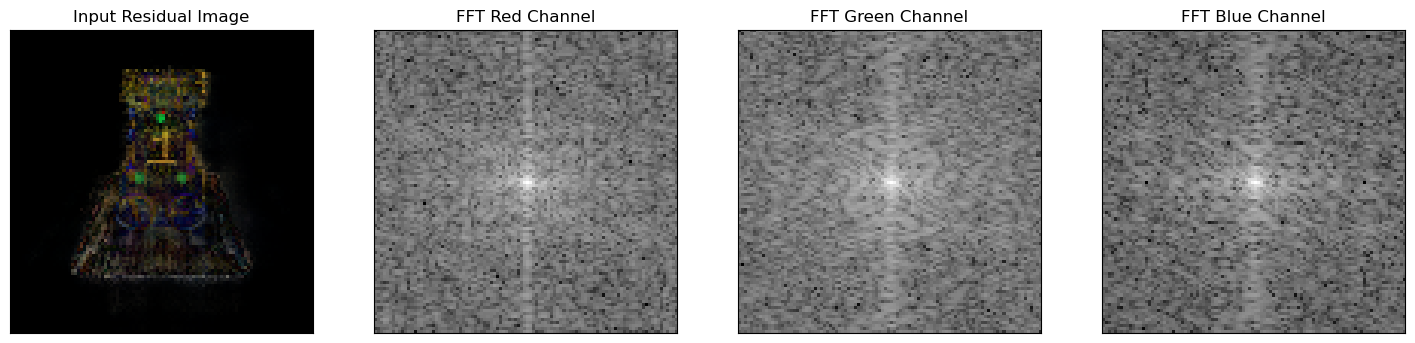

In [27]:
# Split the image into its color channels
channels = cv2.split(residual)

# Initialize a list to hold the magnitude spectrums of the channels
magnitude_spectrums = []

# Perform FFT and shift for each channel
for channel in channels:
    f = np.fft.fft2(channel)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    magnitude_spectrums.append(magnitude_spectrum)

# Plot the original image and the magnitude spectrum of each channel
plt.figure(figsize=(18, 6))

plt.subplot(141), plt.imshow(cv2.cvtColor(residual, cv2.COLOR_BGR2RGB))
plt.title('Input Residual Image'), plt.xticks([]), plt.yticks([])

colors = ['Red Channel', 'Green Channel', 'Blue Channel']
for i, magnitude_spectrum in enumerate(magnitude_spectrums, 2):
    plt.subplot(1, 4, i), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'FFT {colors[i-2]}'), plt.xticks([]), plt.yticks([])

plt.show()

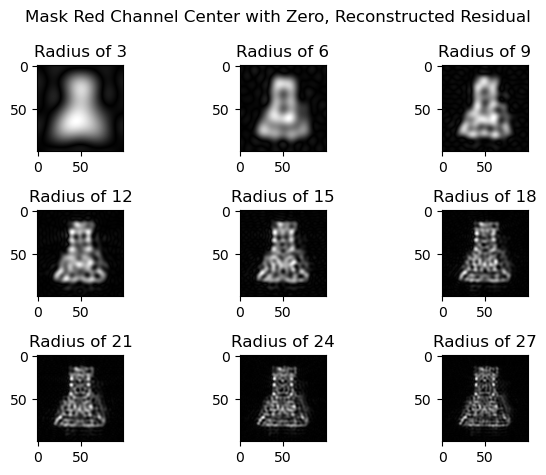

In [47]:
fig,ax = plt.subplots(3,3)

for i,axx in enumerate(ax.flatten()):

    # Example position of interest (this is just an arbitrary example)
    position_of_interest = (50, 50)
    radius = 3*(i+1)  # Radius around the spot to include in the mask

    # Example for the Red channel
    red_channel_fft = np.fft.fft2(channels[0])
    red_channel_fft_shift = np.fft.fftshift(red_channel_fft)

    # Create a mask with the same size as the FFT output, initialized to zero (black)
    mask = np.zeros_like(channels[0], dtype=np.uint8)

    # Create a circular mask at the position with the given radius
    cv2.circle(mask, position_of_interest, radius, 1, -1)

    # Apply the mask to the shift-transformed frequency domain
    fshift_masked = red_channel_fft_shift * mask

    # Inverse FFT to bring the masked image back to the spatial domain
    masked_img_back = np.fft.ifft2(np.fft.ifftshift(fshift_masked))
    masked_img_back = np.abs(masked_img_back)

    # Display the masked-back image
    axx.imshow(masked_img_back, cmap='gray')
    axx.set_title(f'Radius of {radius}')

plt.suptitle("Mask Red Channel Center with Zero, Reconstructed Residual")
plt.tight_layout()
plt.show()



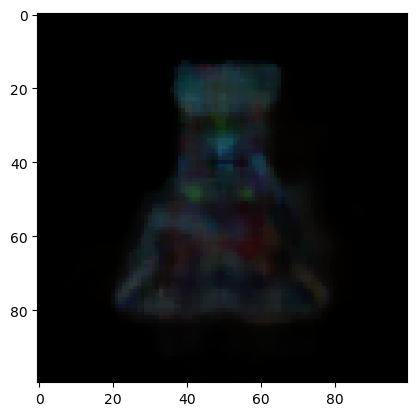

In [57]:
# # Apply Median filtering to each channel
# median_filtered_channels = [cv2.medianBlur(channel, 5) for channel in channels]

# # Merge the channels back
# denoised_image_median = cv2.merge(median_filtered_channels)

# Apply Gaussian blur to each channel
blurred_channels = [cv2.GaussianBlur(channel, (5, 5), 0) for channel in channels]

# Merge the channels back
denoised_image_gaussian = cv2.merge(blurred_channels)

# Display or save the denoised image
plt.imshow(denoised_image_median)

Text(0.5, 1.0, 'Channel-Wise Gaussian Blur to the Residual')

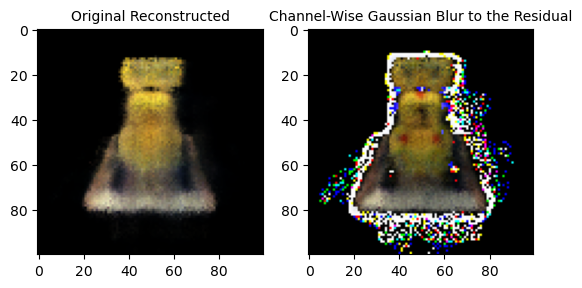

In [69]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(reconstructed, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(reconstructed - denoised_image_gaussian, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Reconstructed",fontsize = 10)
ax[1].set_title("Channel-Wise Gaussian Blur to the Residual + Reconstructed",fontsize = 10)

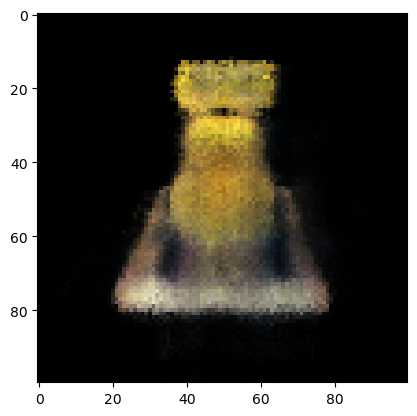

In [61]:
plt.imshow(cv2.cvtColor(reconstructed, cv2.COLOR_BGR2RGB))

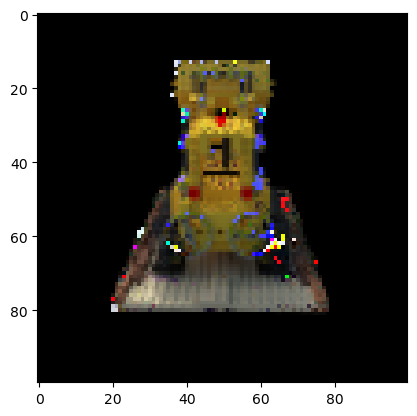

In [59]:
plt.imshow(cv2.cvtColor(reconstructed - residual, cv2.COLOR_BGR2RGB))